In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#shish




In [3]:
SourceType = 'rad'#SourceType=['mono','rad']
SourceRegion = 'nucleus' #SourceRegion=['nucleus','cytoplasm','membrane','cell']
CellGeometry = 'ell'#CellGeometry=['sph','ell']
CellModel = '231'#CellModel=['231','361','468']
Angle = '90'#Angle=['00','45','90']

if CellGeometry == 'ell':
    filename = "/home/anton/EGSnrc/egs_home/egs_chamber/"+CellGeometry+"_"+SourceType+"_mdamb"+CellModel+"_"+Angle+"/yield_"+CellGeometry+"_source_"+SourceRegion+"_"+CellModel+"_"+Angle+".csv"
elif CellGeometry == 'sph' and Angle == 'na':
    filename = "/home/anton/EGSnrc/egs_home/egs_chamber/sph_"+SourceType+"/yield_"+CellGeometry+"_mdamb"+CellModel+"_source_"+SourceRegion+".csv"

sourcedict = {"cell":"Cell",
              'nucleus':'Nucleus',
              'cytoplasm':'Cytoplasm',
              'membrane':"Membrane"}

print(filename)
df = pd.read_csv(filename)
print(df)
df = df.drop(columns=['Unnamed: 0','ERROR','ERROR.1','ERROR.2','ERROR.3','ERROR.4','ERROR.5','ERROR.6','ERROR.7'])
source = {"cytoplasm":"Cy","membrane":"M","nucleus":"N","cell":"C"}
df['C_ratio'] = df.iloc[:, 8]/df.iloc[:, 1]
df['N_ratio'] = df.iloc[:, 5]/df.iloc[:, 2]
df['Cy_ratio'] = df.iloc[:, 6]/df.iloc[:, 3]
df['M_ratio'] = df.iloc[:, 7]/df.iloc[:, 4]
print(df)



/home/anton/EGSnrc/egs_home/egs_chamber/ell_rad_mdamb231_90/yield_ell_source_nucleus_231_90.csv
   Unnamed: 0 Radionuclides    N1->C1  ERROR    N1->N1  ERROR.1   N1->Cy1  \
0           0        Tc-99m  0.000130  0.030  0.000690    0.026  0.000017   
1           1        In-111  0.000287  0.059  0.001293    0.050  0.000084   
2           2         I-123  0.000295  0.056  0.001364    0.045  0.000080   
3           3         I-125  0.000654  0.050  0.003067    0.040  0.000168   
4           4        Tl-201  0.000769  0.054  0.003689    0.051  0.000182   

   ERROR.2    N1->M1  ERROR.3    N1->N2  ERROR.4   N1->Cy2  ERROR.5    N1->M2  \
0    0.141  0.000007    0.577  0.000003    0.613  0.000002    0.341  0.000002   
1    0.144  0.000039    0.557  0.000003    0.953  0.000004    0.495  0.000006   
2    0.148  0.000047    0.487  0.000006    0.958  0.000007    0.451  0.000009   
3    0.140  0.000102    0.438  0.000019    0.960  0.000018    0.465  0.000021   
4    0.138  0.000060    0.645  0.000

In [4]:
if SourceType == 'mono':
    """
    plt.plot(df['Energy'],df.iloc[:, 1], label=source[SourceRegion]+r'$_0$$\rightarrow$C$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 2], label=source[SourceRegion]+r'$_0$$\rightarrow$N$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 3], label=source[SourceRegion]+r'$_0$$\rightarrow$Cy$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 4], label=source[SourceRegion]+r'$_0$$\rightarrow$M$_0$', marker = 'o', markersize=5)
    """
    plt.plot(df['Energy'],df.iloc[:, 1], label=r'C$_0$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 2], label=r'N$_0$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 3], label=r'Cy$_0$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 4], label=r'M$_0$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)

    plt.legend()
    plt.suptitle("Electron Energy vs. S-values in Target Cell")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    plt.xlabel("Electron Energy (keV)")
    plt.ylabel("S-value (Gy/Bq/s)")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_self"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)

In [5]:
if SourceType == 'mono':
    """
    plt.plot(df['Energy'],df.iloc[:, 8], label=source[SourceRegion]+r'$_0$$\rightarrow$C$_1$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 5], label=source[SourceRegion]+r'$_0$$\rightarrow$N$_1$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 6], label=source[SourceRegion]+r'$_0$$\rightarrow$Cy$_1$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 7], label=source[SourceRegion]+r'$_0$$\rightarrow$M$_1$', marker = 'o', markersize=5)
    """
    plt.plot(df['Energy'],df.iloc[:, 8], label=r'C$_1$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 5], label=r'N$_1$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 6], label=r'Cy$_1$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 7], label=r'M$_1$$\leftarrow$'+source[SourceRegion]+'$_0$', marker = 'o', markersize=5)

    plt.legend()
    plt.suptitle("Electron Energy vs. S-values in Adjacent Cell")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    plt.xlabel("Electron Energy (keV)")
    plt.ylabel("S-value (Gy/Bq/s)")
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_cross"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)

In [6]:
if SourceType == 'mono':
    plt.plot(df['Energy'],df.iloc[:, 9], label='Cell', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 10], label='Nucleus', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 11], label='Cytoplasm', marker = 'o', markersize=5)
    plt.plot(df['Energy'],df.iloc[:, 12], label='Membrane', marker = 'o', markersize=5)
    plt.legend()
    plt.suptitle("Cross-Dose to Self-Dose Ratios")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    plt.xlabel("Electron Energy (keV)")
    plt.ylabel(r"S$_{cross}$/S$_{self}$")
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_ratio"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)

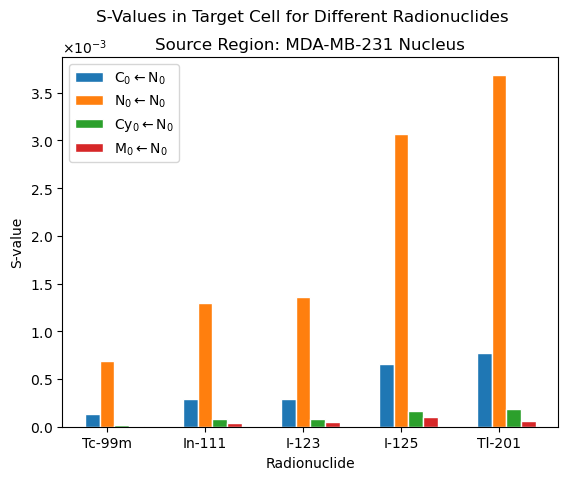

In [7]:
if SourceType == 'rad':
    Radionuclides = list(df['Radionuclides'])
    bar_width=0.15
    r1 = np.arange(5)
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]   
    r4 = [x + bar_width for x in r3]   
    """
    plt.bar(r1,df.iloc[:, 1], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$C$_0$')
    plt.bar(r2,df.iloc[:, 2], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$N$_0$')
    plt.bar(r3,df.iloc[:, 3], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$Cy$_0$')
    plt.bar(r4,df.iloc[:, 4], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$M$_0$')
    """
    plt.bar(r1,df.iloc[:, 1], width=bar_width, edgecolor='white', label=r'C$_0$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r2,df.iloc[:, 2], width=bar_width, edgecolor='white', label=r'N$_0$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r3,df.iloc[:, 3], width=bar_width, edgecolor='white', label=r'Cy$_0$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r4,df.iloc[:, 4], width=bar_width, edgecolor='white', label=r'M$_0$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.xticks([r + bar_width for r in range(5)], Radionuclides)
    plt.legend()

    plt.xlabel('Radionuclides')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

    plt.suptitle("S-Values in Target Cell for Different Radionuclides")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    #plt.title("Ellipsoidal Models for MDA-MB-"+CellModel+" at "+Angle+"\u00B0")
    plt.xlabel("Radionuclide")
    plt.ylabel("S-value")
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_self"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)
    
    

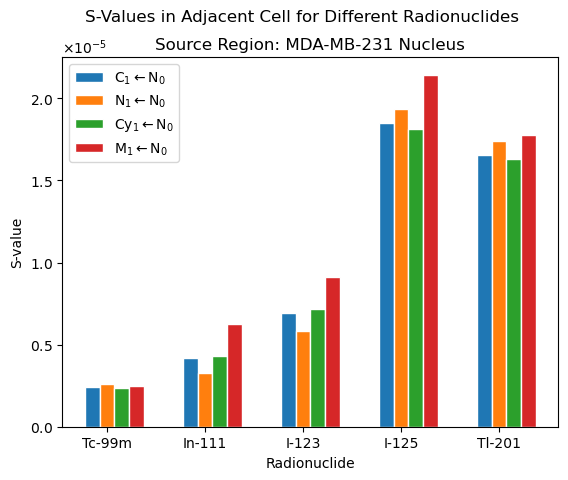

In [8]:
if SourceType == 'rad':
    Radionuclides = list(df['Radionuclides'])
    bar_width=0.15
    r1 = np.arange(5)
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]   
    r4 = [x + bar_width for x in r3]   
    """
    plt.bar(r1,df.iloc[:, 8], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$C$_1$')
    plt.bar(r2,df.iloc[:, 5], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$N$_1$')
    plt.bar(r3,df.iloc[:, 6], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$Cy$_1$')
    plt.bar(r4,df.iloc[:, 7], width=bar_width, edgecolor='white', label=source[SourceRegion]+r'$_0$$\rightarrow$M$_1$')
    """
    plt.bar(r1,df.iloc[:, 8], width=bar_width, edgecolor='white', label=r'C$_1$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r2,df.iloc[:, 5], width=bar_width, edgecolor='white', label=r'N$_1$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r3,df.iloc[:, 6], width=bar_width, edgecolor='white', label=r'Cy$_1$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.bar(r4,df.iloc[:, 7], width=bar_width, edgecolor='white', label=r'M$_1$$\leftarrow$' + source[SourceRegion]+r'$_0$')
    plt.xticks([r + bar_width for r in range(5)], Radionuclides)
    plt.legend()

    plt.xlabel('Radionuclides')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

    plt.suptitle("S-Values in Adjacent Cell for Different Radionuclides")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    plt.xlabel("Radionuclide")
    plt.ylabel("S-value")
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_cross"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)

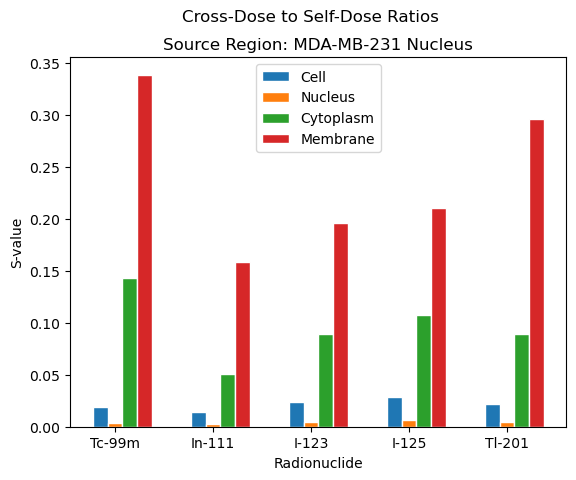

In [9]:
if SourceType == 'rad':
    Radionuclides = list(df['Radionuclides'])
    bar_width=0.15
    r1 = np.arange(5)
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]   
    r4 = [x + bar_width for x in r3]   

    plt.bar(r1,df.iloc[:, 9], width=bar_width, edgecolor='white', label='Cell')
    plt.bar(r2,df.iloc[:, 10], width=bar_width, edgecolor='white', label='Nucleus')
    plt.bar(r3,df.iloc[:, 11], width=bar_width, edgecolor='white', label='Cytoplasm')
    plt.bar(r4,df.iloc[:, 12], width=bar_width, edgecolor='white', label='Membrane')
    plt.xticks([r + bar_width for r in range(5)], Radionuclides)
    plt.legend()

    plt.xlabel('Radionuclides')
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

    plt.suptitle("Cross-Dose to Self-Dose Ratios")
    plt.title("Source Region: "+"MDA-MB-"+CellModel+" "+sourcedict[SourceRegion])
    plt.xlabel("Radionuclide")
    plt.ylabel("S-value")
    picname = CellGeometry +"_"+ SourceType + "_mdamb"+CellModel+"_"+SourceRegion+"_ratio"
    if Angle != "na":
        picname = picname + Angle
    picname = picname + ".png"
    plt.savefig(picname)